In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

jpm = pd.read_csv('JPM.csv')
jpm.head()

signal = np.copy(jpm.Close.values)


In [4]:
def removal(signal, repeat):
    copy_signal = np.copy(signal)
    for j in range(repeat):
        for i in range(3, len(signal)):
            copy_signal[i - 1] = (copy_signal[i - 2] + copy_signal[i]) / 2
    return copy_signal



def get(original_signal, removed_signal):
    buffer = []
    for i in range(len(removed_signal)):
        buffer.append(original_signal[i] - removed_signal[i])
    return np.array(buffer)

removed_signal = removal(signal, 30)
noise = get(signal, removed_signal)

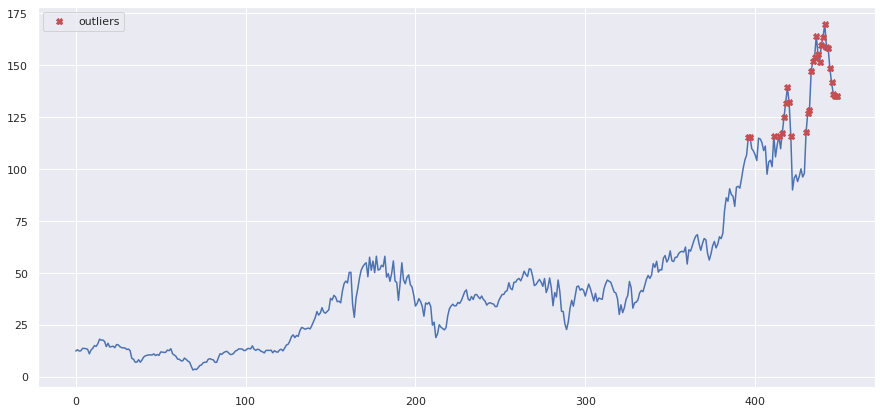

In [5]:
plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)
plt.plot(removed_signal)
plt.title('timeseries without noise')
plt.subplot(2, 1, 2)
plt.plot(noise)
plt.title('noise timeseries')
plt.show()